# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
dataset.head(3)

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB


In [16]:
dataset.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

Rta 1: El conjunto de datos da informacion sobre préstamos con garantía hipotecaria que realizaron diferentes personas recolectadas por un banco.

Rta 2: La variable objetivo "`TARGET`", nos da informacion si el cliente a pagado el credito (Etiqueta=0), o sin no lo ha pagado (Etiqueta=1). COn la informacion de las otras variables del dataset, debemos predecir si el cliente pagara o no.

Rta 3: Atributos:
* `LOAN`: Importe del préstamo.
* `MORTDUE`: Importe adeudado de la hipoteca actual 
* `VALUE` Valor de la propiedad actual
* `YOJ` Años en el trabajo actual
* `DEROG` Número de informes derogatorios importantes
* `DELINQ` Número de líneas de crédito morosas
* `CLAGE` Antigüedad de la línea comercial más antigua en meses
* `NINQ` Número de líneas de crédito recientes
* `CLNO` Número de líneas de crédito
* `DEBTINC` Raelacion deuda-ingresos

Rta 4: `LOAN`, `MORTDUE`, `YOJ`, `DELINQ`,`DEBTINC`


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


In [3]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [13]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.linear_model import SGDClassifier
#SGDClassifier??

model = SGDClassifier(random_state=123)
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### Metricas Entrenamiento

In [14]:
#Metricas basadas en la matriz de confusion

y_true=y_train
y_pred=y_train_pred

print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))
print(f1_score(y_true, y_pred))

print(classification_report(y_true, y_pred))


0.25
0.008733624454148471
0.016877637130801686
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1068
           1       0.25      0.01      0.02       229

    accuracy                           0.82      1297
   macro avg       0.54      0.50      0.46      1297
weighted avg       0.72      0.82      0.75      1297



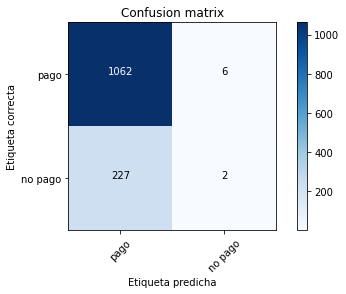

In [15]:
from sklearn.metrics import confusion_matrix
y_true=y_train
y_pred=y_train_pred

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()


from utils import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(cm, ['pago', 'no pago'])
plt.show()

#### Metricas Evaculacion

0.25
0.0125
0.023809523809523808
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       477
           1       0.25      0.01      0.02        80

    accuracy                           0.85       557
   macro avg       0.55      0.50      0.47       557
weighted avg       0.77      0.85      0.79       557



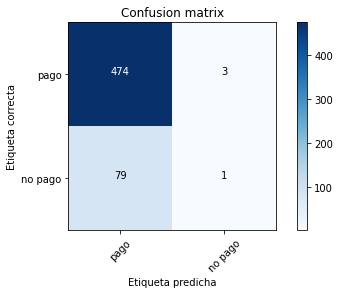

In [18]:
y_true=y_test
y_pred=y_test_pred

print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))
print(f1_score(y_true, y_pred))

print(classification_report(y_true, y_pred))


###############
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

plot_confusion_matrix(cm, ['pago', 'no pago'])
plt.show()


### Ejercicio 2.2: Ajuste de Hiperparámetros


Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html,
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
from sklearn.utils.fixes import loguniform

#SGDClassifier??

param = {
    'loss': [
        'hinge',          # linear support vector machine (SVM)
        'log',            # logistic regression
        'modified_huber', # smooth loss - tolerance outliers - probability estimates
    ],
    #'alpha': loguniform(1e-4, 1e2),  # de 0.0001 a 100.0
    'alpha': [0.0001,0.001,0.01,0.1,1,10,50,100],  # de 0.0001 a 100.0
    'learning_rate': [
        'optimal',
        #'adaptive',
    ],
}

In [20]:
from sklearn.model_selection import ParameterSampler

for params in ParameterSampler(param, 10, random_state=0):
    print(params)
    model = SGDClassifier(**params, random_state=0)
    #model.fit(...)
    #model.predict(...)

{'loss': 'modified_huber', 'learning_rate': 'optimal', 'alpha': 0.1}
{'loss': 'log', 'learning_rate': 'optimal', 'alpha': 0.1}
{'loss': 'log', 'learning_rate': 'optimal', 'alpha': 100}
{'loss': 'modified_huber', 'learning_rate': 'optimal', 'alpha': 1}
{'loss': 'modified_huber', 'learning_rate': 'optimal', 'alpha': 50}
{'loss': 'log', 'learning_rate': 'optimal', 'alpha': 0.0001}
{'loss': 'log', 'learning_rate': 'optimal', 'alpha': 1}
{'loss': 'modified_huber', 'learning_rate': 'optimal', 'alpha': 100}
{'loss': 'log', 'learning_rate': 'optimal', 'alpha': 10}
{'loss': 'modified_huber', 'learning_rate': 'optimal', 'alpha': 0.01}


In [21]:
from sklearn.model_selection import GridSearchCV

model = SGDClassifier(random_state=0)

#scores = ["precision", "recall"]
cv = GridSearchCV(model, param, scoring='accuracy', cv=3)
cv.fit(X_train,y_train)

cv.best_params_

{'alpha': 10, 'learning_rate': 'optimal', 'loss': 'log'}

In [22]:
results = cv.cv_results_

In [23]:
import pandas as pd
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,mean_test_score,std_test_score,rank_test_score
0,hinge,0.0001,0.791877,0.045534,13
1,log,0.0001,0.814195,0.008331,3
2,modified_huber,0.0001,0.814195,0.008331,3
3,hinge,0.001,0.791877,0.045534,13
4,log,0.001,0.814195,0.008331,3
5,modified_huber,0.001,0.814195,0.008331,3
6,hinge,0.01,0.791877,0.045534,13
7,log,0.01,0.814195,0.008331,3
8,modified_huber,0.01,0.814195,0.008331,3
9,hinge,0.1,0.791877,0.045534,13


In [24]:
from sklearn.metrics import classification_report

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       477
           1       0.00      0.00      0.00        80

    accuracy                           0.86       557
   macro avg       0.43      0.50      0.46       557
weighted avg       0.73      0.86      0.79       557



/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el modelo
model = DecisionTreeClassifier(random_state=0)

# Entrenar el modelo
model.fit(X_train, y_train)
model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=0)>

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [27]:
# Definir el modelo
model = DecisionTreeClassifier(random_state=377)

# Definir la grilla de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
}

# Definir la búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Ajustar la búsqueda de hiperparámetros a los datos
grid_search.fit(X_train, y_train)

# Reportar resultados
cv_results = grid_search.cv_results_
for mean_score, std, params in zip(cv_results['mean_test_score'], cv_results['std_test_score'], cv_results['params']):
    print(f"{mean_score:.3f} (+/-{std:.3f}) for {params}")

# Obtener el mejor modelo
best_model = grid_search.best_estimator_


# Predecir y calcular métricas sobre el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)

# Predecir y calcular métricas sobre el conjunto de evaluación
y_test_pred = best_model.predict(X_test)



/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 348, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  FitFailedWarning)
/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on thi

0.874 (+/-0.020) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
0.874 (+/-0.022) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2}
0.863 (+/-0.032) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4}
0.866 (+/-0.030) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6}
0.874 (+/-0.032) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 8}
0.874 (+/-0.032) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10}
0.864 (+/-0.024) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 12}
0.866 (+/-0.015) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 14}
0.862 (+/-0.020) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
0.862 (+/-0.020) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}
0.862 (+/-0.022) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}
0.862 (+/-0.022) for {'criterion': 'gini', 'max_depth': 2, 'min_samples

/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 348, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  FitFailedWarning)
/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on thi

In [28]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=12, random_state=377)